In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# **Task 1 : Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.**

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [98]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [99]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [100]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [101]:
# Apply One Hot Encoding on fuel type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


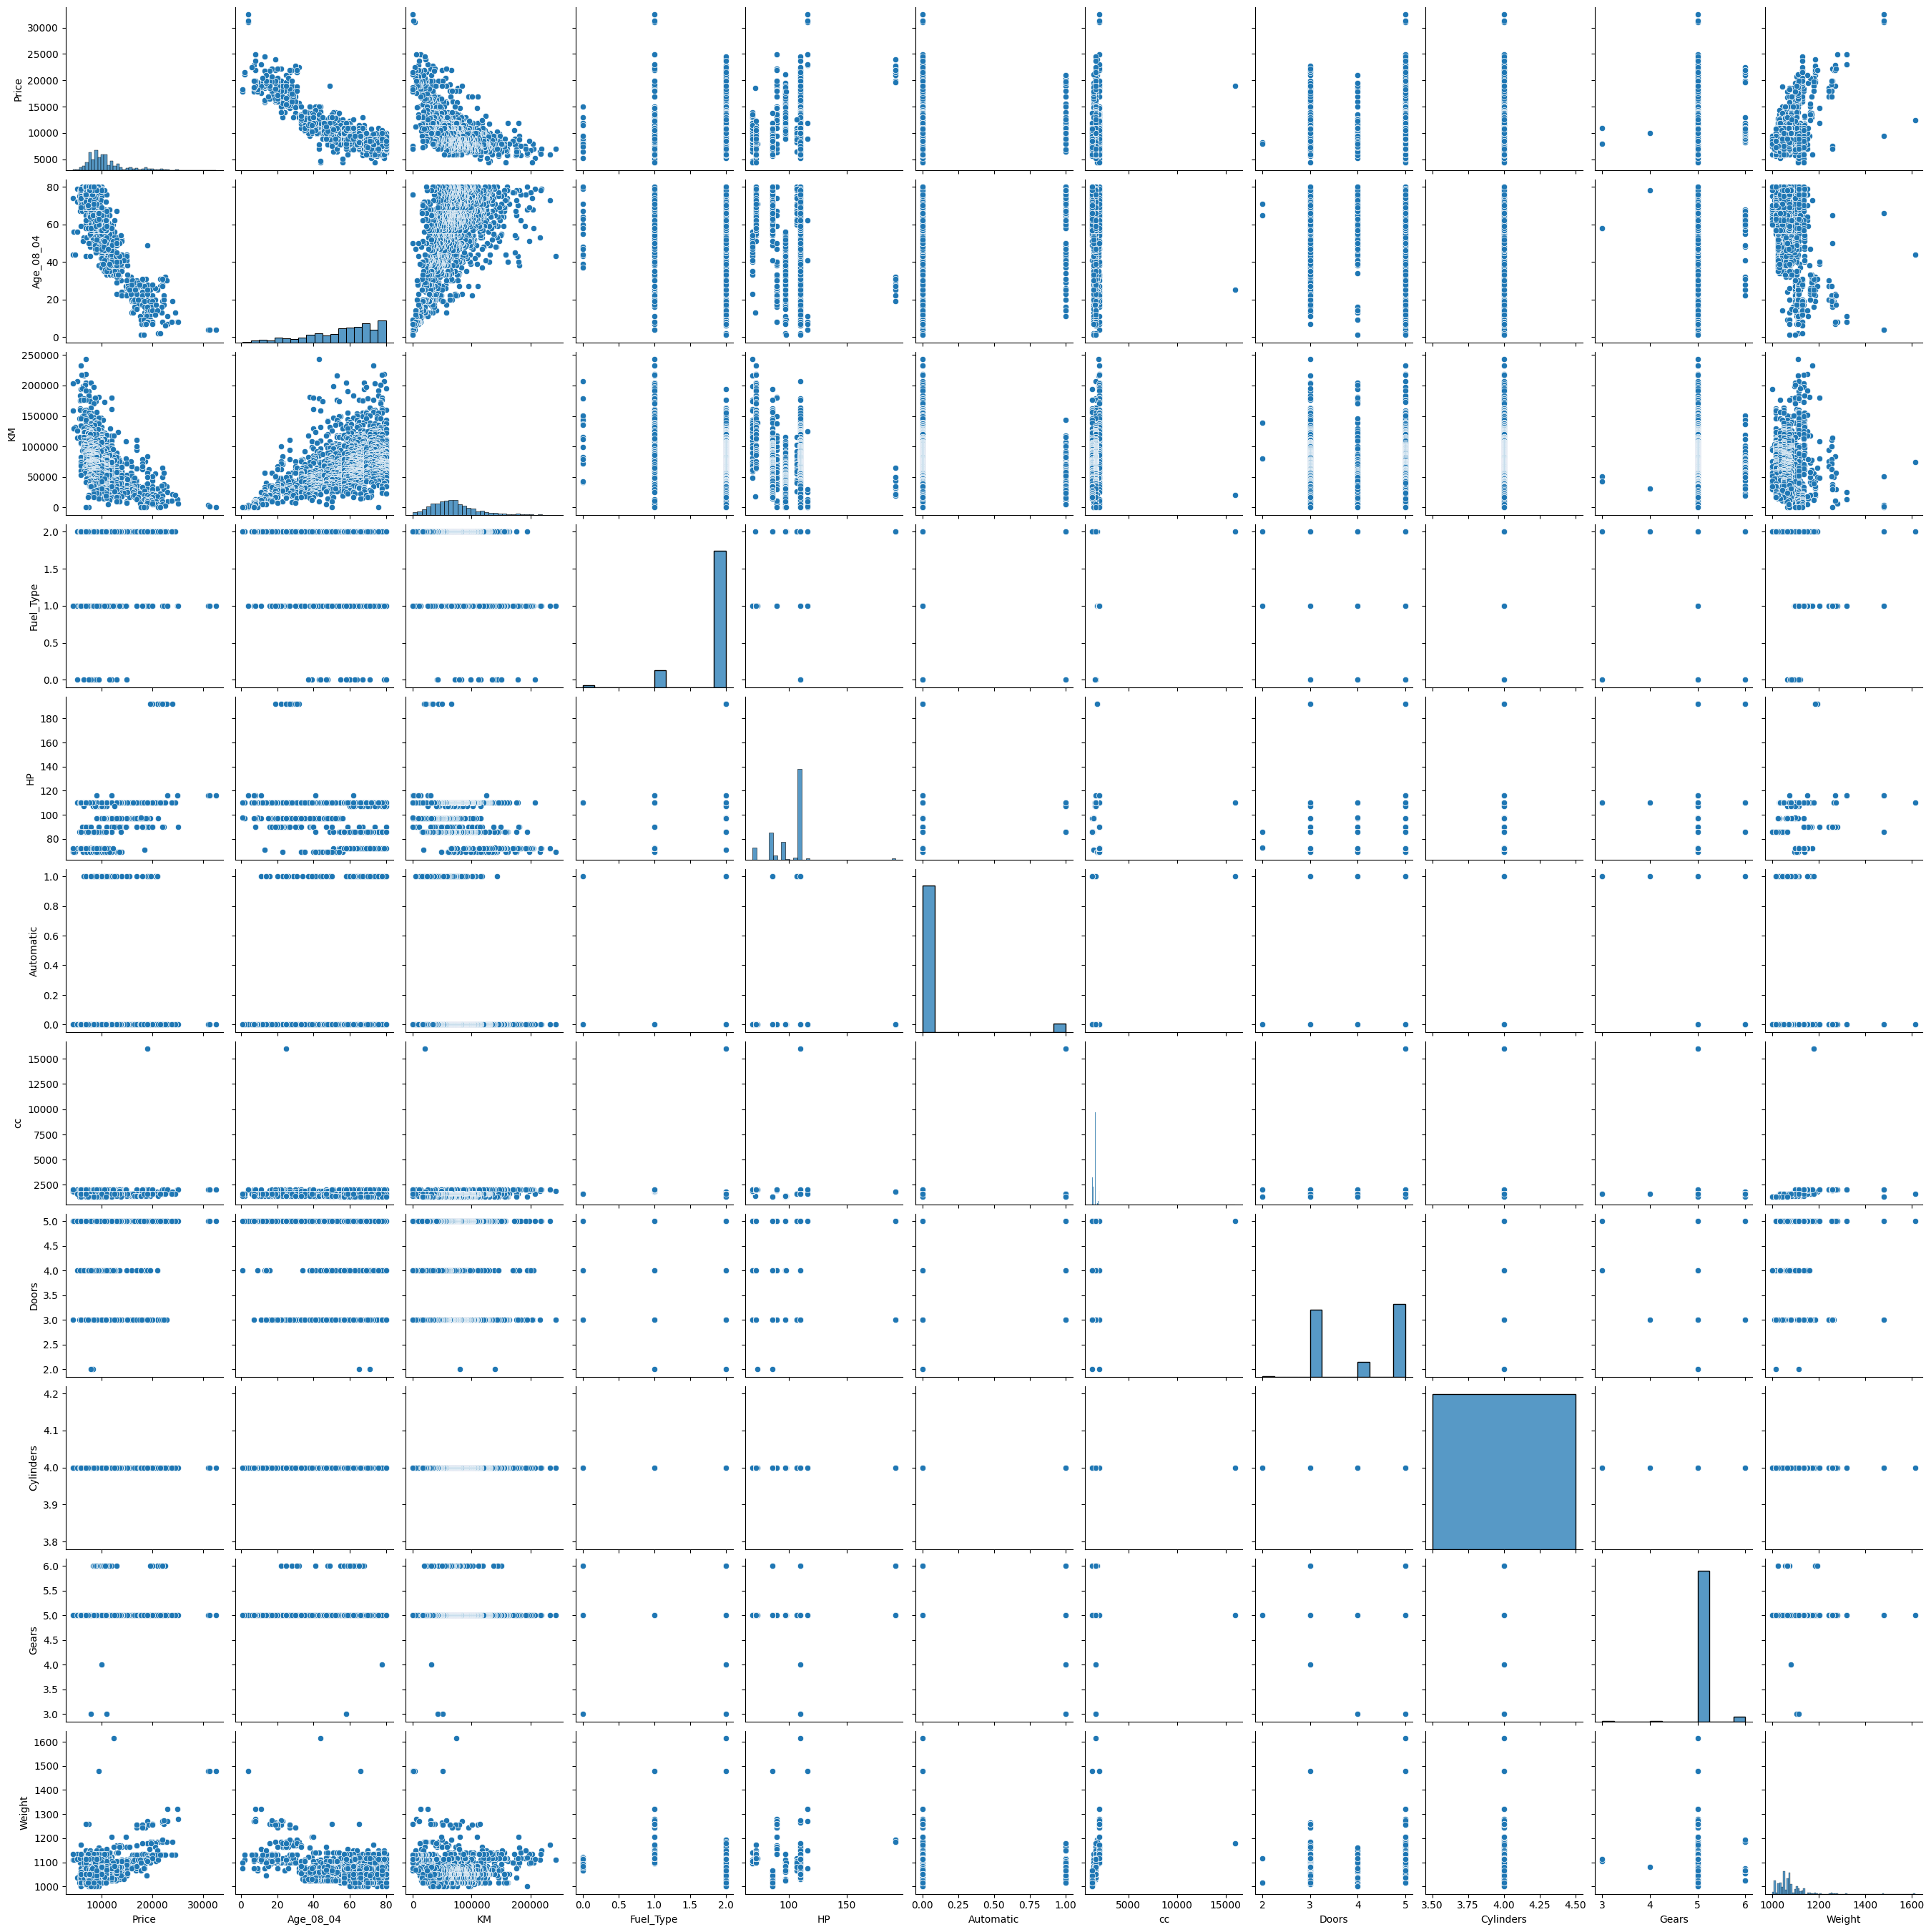

In [102]:
sns.pairplot(df)
plt.show()

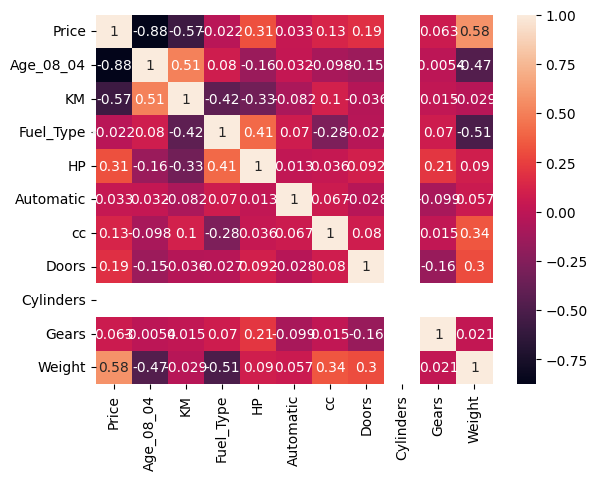

In [103]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [104]:
# Seperate dependent and independent variable
x=df.drop(columns=['Price'],axis=1)
y=df['Price']

# **Task 2 : Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Task 3 : Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.**

In [106]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Model 1: Using all features
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print("Model 1 Summary:")
print(model1.summary())

# Calculate VIF for Model 1 features
vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print("\nVIF for Model 1 Features:")
print(vif_data)

# Model 2: Feature selection based on VIF or p-value (example using p-value from Model 1)
# Let's select features with p-value < 0.05 from Model 1
significant_features = model1.pvalues[model1.pvalues < 0.05].index.tolist()
# Remove 'const' if it's in the list
if 'const' in significant_features:
    significant_features.remove('const')

x_train_subset1 = x_train[significant_features]
model2 = sm.OLS(y_train, sm.add_constant(x_train_subset1)).fit()
print("\nModel 2 Summary (Features selected based on p-value):")
print(model2.summary())

# Model 3: Feature selection based on VIF (example selecting features with VIF < 5)
# Let's calculate VIF for all features first to decide
vif_data_all = pd.DataFrame()
vif_data_all["feature"] = x_train.columns
vif_data_all["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

low_vif_features = vif_data_all[vif_data_all['VIF'] < 5]['feature'].tolist()
x_train_subset2 = x_train[low_vif_features]

model3 = sm.OLS(y_train, sm.add_constant(x_train_subset2)).fit()
print("\nModel 3 Summary (Features selected based on VIF < 5):")
print(model3.summary())

Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     842.5
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:32:28   Log-Likelihood:                -9866.5
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1138   BIC:                         1.980e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -121.4362      2.884   

# **Task 4 : Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.**

In [107]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import statsmodels.api as sm

# Add constant to testing data
x_test_with_const = sm.add_constant(x_test, has_constant='add')

# Model 1 Evaluation
exog1 = x_test_with_const.reindex(columns=model1.params.index, fill_value=0)
y_pred1 = model1.predict(exog1)

r2_1 = r2_score(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)
mse_1 = mean_squared_error(y_test, y_pred1)
rmse_1 = np.sqrt(mse_1)

print("Model 1 Evaluation on Testing Data:")
print(f"R-squared: {r2_1:.4f}")
print(f"MAE      : {mae_1:.4f}")
print(f"MSE      : {mse_1:.4f}")
print(f"RMSE     : {rmse_1:.4f}")


# Model 2 Evaluation (p-value selected)
exog2 = x_test_with_const.reindex(columns=model2.params.index, fill_value=0)
y_pred2 = model2.predict(exog2)

r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
mse_2 = mean_squared_error(y_test, y_pred2)
rmse_2 = np.sqrt(mse_2)

print("\nModel 2 Evaluation on Testing Data (p-value selected):")
print(f"R-squared: {r2_2:.4f}")
print(f"MAE      : {mae_2:.4f}")
print(f"MSE      : {mse_2:.4f}")
print(f"RMSE     : {rmse_2:.4f}")


# Model 3 Evaluation (VIF selected)
exog3 = x_test_with_const.reindex(columns=model3.params.index, fill_value=0)
y_pred3 = model3.predict(exog3)

r2_3 = r2_score(y_test, y_pred3)
mae_3 = mean_absolute_error(y_test, y_pred3)
mse_3 = mean_squared_error(y_test, y_pred3)
rmse_3 = np.sqrt(mse_3)

print("\nModel 3 Evaluation on Testing Data (VIF selected):")
print(f"R-squared: {r2_3:.4f}")
print(f"MAE      : {mae_3:.4f}")
print(f"MSE      : {mse_3:.4f}")
print(f"RMSE     : {rmse_3:.4f}")


Model 1 Evaluation on Testing Data:
R-squared: 0.8428
MAE      : 992.8983
MSE      : 2096851.1400
RMSE     : 1448.0508

Model 2 Evaluation on Testing Data (p-value selected):
R-squared: 0.8423
MAE      : 997.9098
MSE      : 2104229.8340
RMSE     : 1450.5964

Model 3 Evaluation on Testing Data (VIF selected):
R-squared: 0.8428
MAE      : 992.8983
MSE      : 2096851.1400
RMSE     : 1448.0508


# **Task 5 : Apply Lasso and Ridge methods on the model.**

In [109]:
from sklearn.linear_model import Lasso, Ridge

# Apply Lasso Regression
lasso = Lasso(alpha=0.5)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Regression Evaluation on Testing Data:")
print(f"R-squared: {r2_lasso:.4f}")
print(f"MAE: {mae_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")

# Apply Ridge Regression
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("\nRidge Regression Evaluation on Testing Data:")
print(f"R-squared: {r2_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")

Lasso Regression Evaluation on Testing Data:
R-squared: 0.8429
MAE: 992.9063
MSE: 2096214.6029
RMSE: 1447.8310

Ridge Regression Evaluation on Testing Data:
R-squared: 0.8429
MAE: 992.8861
MSE: 2096073.2657
RMSE: 1447.7822


# **Interview Questions**

**1. What is Normalization & Standardization and how is it helpful?**

Normalization and Standardization are data preprocessing techniques used to scale numerical features to a similar range. This is important for many machine learning algorithms that are sensitive to the scale of input features.

**1) Normalization (Min-Max Scaling)**:
* Rescales the features to a fixed range, usually between 0 and 1.
* The formula is:  Xnormalized=X−Xmin/Xmax−Xmin
* It is useful when the data has varying scales and the distribution is not Gaussian (normal).

**2) Standardization (Z-score Scaling)**:
* Rescales the features to have a mean of 0 and a standard deviation of 1.
* The formula is:  Xstandardized=(X−μ)/σ  (where  μ  is the mean and  σ  is the standard deviation)
* It is useful when the data has a Gaussian distribution or when algorithms like linear regression, logistic regression, and support vector machines are used, as they assume the data is centered around zero and has unit variance.

**How they are helpful**:
* Improved Algorithm Performance: Many machine learning algorithms (e.g., gradient descent-based algorithms, distance-based algorithms like k-NN and SVM) perform better when features are on a similar scale.
* Faster Convergence: Algorithms that use gradient descent converge faster when features are scaled.
* Preventing Dominance of Features: Features with larger values do not disproportionately influence the model's outcome compared to features with smaller values.
* Handling Outliers (Normalization can be sensitive): Standardization is generally less affected by outliers than normalization.

**2) What techniques can be used to address multicollinearity in multiple linear regression?**

Techniques to address multicollinearity in multiple linear regression:

Multicollinearity occurs when independent variables in a regression model are highly correlated. This can cause problems with interpreting the model coefficients and can lead to unstable estimates. Here are some techniques to address it:

**1) Identify Multicollinearity**:

* Correlation Matrix: Examine the correlation matrix
of the independent variables. High correlation coefficients (e.g., above 0.8 or 0.9) indicate potential multicollinearity.
* Variance Inflation Factor (VIF): Calculate the VIF for each independent variable. A high VIF (a common threshold is 5 or 10) suggests that the variable is highly correlated with other predictors.

**2) Address Multicollinearity**:

* Remove one of the correlated variables: If two variables are highly correlated, you can remove one of them from the model. Choose the variable that is less theoretically important or has a weaker relationship with the dependent variable.
* Combine correlated variables: If several variables are measuring similar concepts, you can combine them into a single variable (e.g., by averaging or summing them) or use dimensionality reduction techniques like Principal Component Analysis (PCA).
* Ridge Regression or Lasso Regression: These are regularization techniques that can handle multicollinearity by adding a penalty term to the cost function, which shrinks the coefficients of correlated variables.
* Collect more data: In some cases, multicollinearity might be a result of insufficient data. Collecting more data can sometimes help to reduce the correlations between variables.
* Domain knowledge: Use your understanding of the data and the problem to decide which variables are most important and should be kept in the model.